# Import Library

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from sklearn.cluster import hierarchical
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# common configs

In [5]:
point_size_small=50
point_size_big=100
colors=['red',"green",'lightblue','pink','yellow','blue']

# Import Data

In [6]:
data=pd.read_csv("HTRU_2.csv",header=None)

In [7]:
data

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


# dimentionality reduction

In [8]:
data_2d = PCA(n_components=2).fit_transform(data.iloc[:,:-1])
X_std = pd.DataFrame(StandardScaler().fit_transform(data_2d),columns=['X','Y'])
X_std.head()

,X,Y
0,-0.252089,-0.918327
1,0.226919,-0.186407
2,-0.370275,-0.335054
3,-0.445017,-0.923135
4,1.371364,0.574384


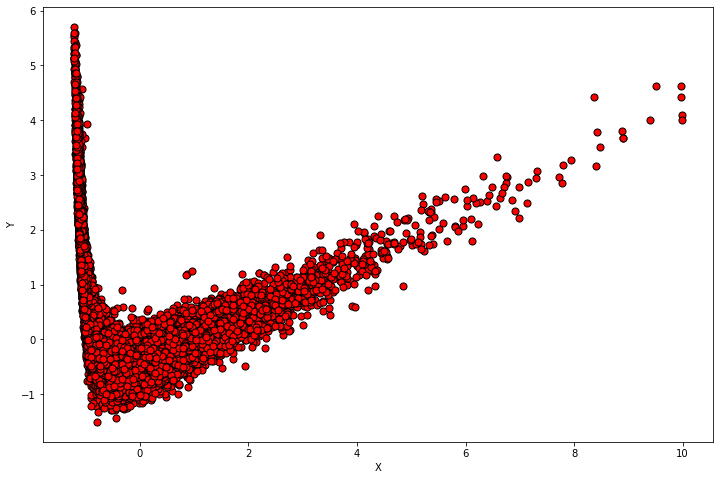

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X_std[['X']],X_std[['Y']],color=colors[0],edgecolors='black',s=point_size_small)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

#  Kmeans

In [10]:
sse=[]
r=range(1,10)
for k in r:
    km=KMeans(n_clusters=k)
    km.fit(X_std)
    sse.append(km.inertia_)

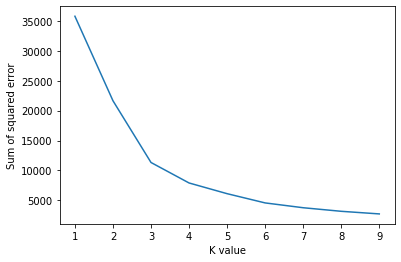

In [11]:
plt.plot(r,sse)
plt.xlabel('K value')
plt.ylabel('Sum of squared error')
plt.show()

In [12]:
km = KMeans(n_clusters= 3, init='k-means++', random_state=0)
cluster= km.fit_predict(X_std)
unique_cluster=np.unique(cluster)

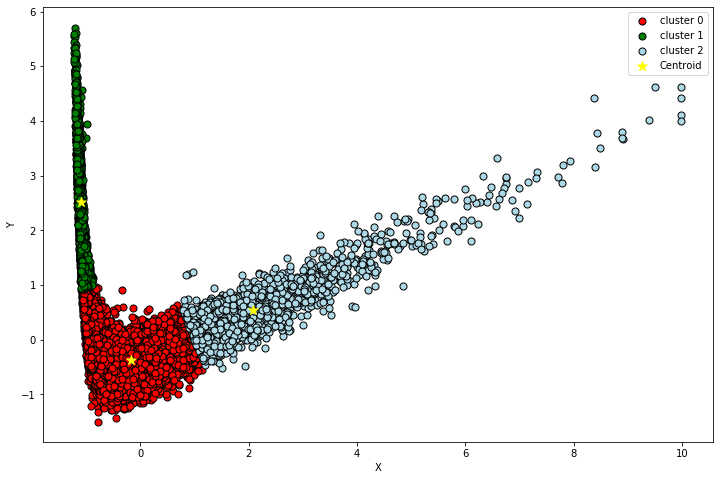

In [13]:
plt.figure(figsize=(12,8))
for i in range(0,len(unique_cluster)):
    C=colors[unique_cluster[i]]
    L='cluster '+ str(unique_cluster[i])
    S=point_size_small
    plt.scatter(X_std["X"].iloc[cluster==unique_cluster[i]],X_std["Y"].iloc[cluster==unique_cluster[i]],color=C,label=L,edgecolors='black',s=S)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c = 'yellow', marker='*', s=point_size_big, label = 'Centroid')
plt.legend()
plt.show()

# DBSCAN

In [14]:
dbs=DBSCAN(eps=0.2,min_samples=5)
cluster=dbs.fit_predict(X_std)
unique_cluster=np.unique(cluster)

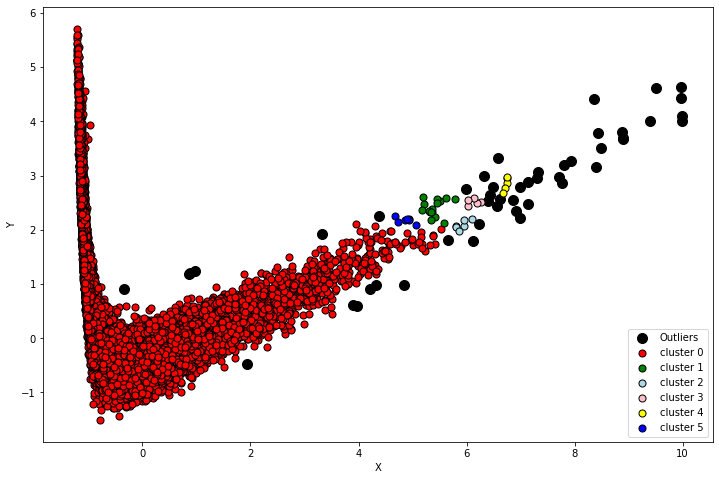

In [15]:
plt.figure(figsize=(12,8))
for i in range(0,len(unique_cluster)):
    if(unique_cluster[i]==-1):
        C='black'
        L='Outliers'
        S=point_size_big
    else:
        C=colors[unique_cluster[i]]
        L='cluster '+ str(unique_cluster[i])
        S=point_size_small
    plt.scatter(X_std["X"].iloc[cluster==unique_cluster[i]],X_std["Y"].iloc[cluster==unique_cluster[i]],color=C,label=L,edgecolors='black',s=S)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Hierarchial Clustering

<function matplotlib.pyplot.show(*args, **kw)>

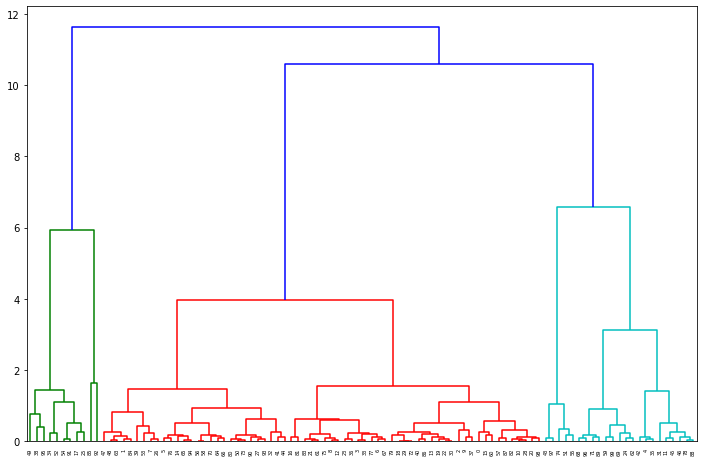

In [16]:
plt.figure(figsize=(12,8))
fig=sch.dendrogram(sch.linkage(X_std.sample(100).values,method='ward'))
plt.show

In [17]:
hag=AgglomerativeClustering(n_clusters=4,linkage='ward',affinity='euclidean')
cluster=hag.fit_predict(X_std)
unique_cluster=np.unique(cluster)

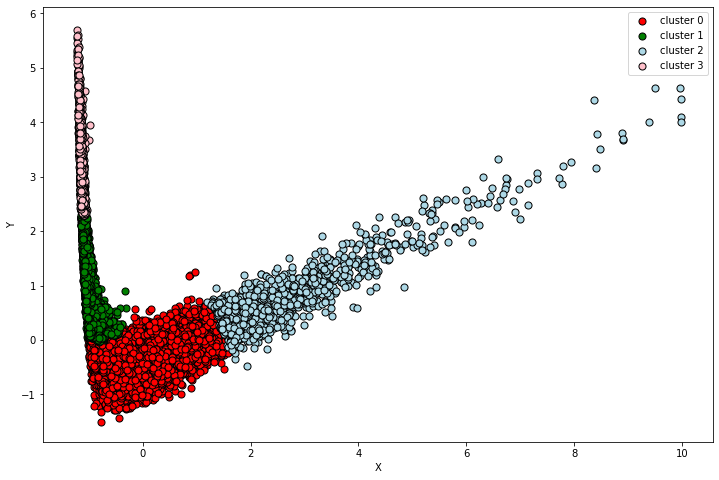

In [18]:
plt.figure(figsize=(12,8))
for i in range(0,len(unique_cluster)):
    C=colors[unique_cluster[i]]
    L='cluster '+ str(unique_cluster[i])
    S=point_size_small
    plt.scatter(X_std["X"].iloc[cluster==unique_cluster[i]],X_std["Y"].iloc[cluster==unique_cluster[i]],color=C,label=L,edgecolors='black',s=S)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()